#Base DESERSION ACADEMICA DE ESTUDIANTES
```
Fuente: https://www.kaggle.com/datasets/naveenkumar20bps1137/predict-students-dropout-and-academic-success
```

In [199]:
import pandas as pd

In [200]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
df= pd.read_csv('/content/drive/MyDrive/_DATA SCIENCE/dataset Students dropout.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#Introducción

**Contexto empresarial**.El rector de la misma expresó en la última asamblea que la deserción estundiantil es uno de los mayores problemas en el proceso de aprendizaje, tanto para el estudiante y las instituciones, y poder predecirlo podría contribuir a aliviar sus costos sociales y económicos.




**Problema empresarial** Para Como parte de la revisión interna, la secretaría académica solicita al área de data science de la institución para investigar específicamente la siguientes preguntas: "En general, ¿cuál es la tasa de alumnos que abandono y de éxito académico? ¿Se puede predecir en base a los datos del último año?"

**Contexto analítico**. El departamento académico le ha proporcionado una base de datos con estudiantes matriculados en diferentes carreras universitarias, como agronomía, diseño, educación, enfermería, periodismo, administración, servicios sociales y tecnologías. El conjunto de datos incluye información conocida en el momento de la inscripción de los estudiantes (académica, demografía y factores socioeconómicos) y el rendimiento académico de los estudiantes al final del primer y segundo semestre.




**Objetivo** construir modelos de clasificación para predecir la deserción escolar y el éxito académico de los estudiantes con alta precisión.

El caso está estructurado de la siguiente manera:
1. realizaremos un análisis de datos exploratorio para investigar visualmente las variables.
2. utilizar los conocimientos observados para ajustar formalmente los modelos de regresión
3. abordar el tema de la deserción estudiantil

# Análisis de los DATOS

In [202]:
print("Estructura de dataframe:", df.shape)
df.info()

Estructura de dataframe: (4424, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mothe

In [203]:
# Corroboramos si hay datos nulos
df.isnull().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

> **Se observa el archivo contien 4424 filas y 35 columnas.**
> **No hay datos nulos. Por lo que no es necesario analizar reemplazo de NaN de datos numéricos ni categóricos.**


Descripción de variables y su reemplazo de Títulos de las columnas

    'Marital status':'Est_Civil',
    'Application mode':'Modo Aplicación',
    'Application order':'Orden Aplicación',
    'Course':'Curso',
    'Daytime/evening attendance':'Turno',
    'Previous qualification':'Nivel_Educ_Previo',
    'Nacionality':'Nacionalidad',
    'Mother\'s qualification':'Nivel_Educ_Madre',
    'Father\'s qualification':'Nivel_Educ_Padre',
    'Mother\'s occupation':'Ocupación Madre',
    'Father\'s occupation':'Ocupación Padre',
    'Displaced':'Desplazada',
    'Educational special needs':'Necesidades Educ Especiales'
    'Debtor':'Deudor',
    'Tuition fees up to d':'Tasa Matrícula hasta d',
    'Gender':'Género',
    'Scholarship holder':'Becario',
    'Age at enrollment':'Edad_Ingresante',
    'International':'International',
    'Curricular units 1st sem (credited)':'Asig 1º sem acreditadas',
    'Curricular units 1st sem (enrolled)':'Asig 1º sem matriculadas',
    'Curricular units 1st sem (evaluations)':'Asig 1º sem evaluadas',
    'Curricular units 1st sem (approved)':'Asig 1º sem aprobadas',
    'Curricular units 1st sem (grade)':'Asig 1º sem calificación',
    'Curricular units 1st sem (without evaluations)':'Asig 1º sem sin evaluación',
    'Curricular units 2nd sem (credited)':'Asig 2º sem acreditadas',
    'Curricular units 2nd sem (enrolled)':'Asig 2º sem matriculadas',
    'Curricular units 2nd sem (evaluations)':'Asig 2º sem evaluadas',
    'Curricular units 2nd sem (approved)':'Asig 2º sem aprobadas',
    'Curricular units 2nd sem (grade)':'Asig 2º sem calificación',
    'Curricular units 2nd sem (without evaluations)':'Asig 2º sem sin evaluationes',
    'Unemployment rate':'Tasa_desempleo',
    'Inflation rate':'Tasa_inflación',
    'GDP':'PBI',
    'Target':'Objetivo'


In [204]:
df = df.rename(columns={'Marital status':'Est_Civil','Application mode':'Modo Aplicación',
'Application order':'Orden Aplicación','Course':'Curso','Daytime/evening attendance':'Turno',
'Previous qualification':'Nivel_Educ_Previo','Nacionality':'Nacionalidad',
'Mother\'s qualification':'Nivel_Educ_Madre','Father\'s qualification':'Nivel_Educ_Padre',
'Mother\'s occupation':'Ocupación Madre','Father\'s occupation':'Ocupación Padre',
'Displaced':'Desplazados','Educational special needs':'Necesidades_Especiales','Debtor':'Deudor',
'Tuition fees up to date':'Pagado','Gender':'Género','Scholarship holder':'Becario',
'Age at enrollment':'Edad_Ingresante','International':'Internacional','Curricular units 1st sem (credited)':'Asig 1º sem acreditadas',
'Curricular units 1st sem (enrolled)':'Asig 1º sem matriculadas','Curricular units 1st sem (evaluations)':'Asig 1º sem evaluadas',
'Curricular units 1st sem (approved)':'Asig 1º sem aprobadas','Curricular units 1st sem (grade)':'Asig 1º sem calificación',
'Curricular units 1st sem (without evaluations)':'Asig 1º sem sin evaluación','Curricular units 2nd sem (credited)':'Asig 2º sem acreditadas',
'Curricular units 2nd sem (enrolled)':'Asig 2º sem matriculadas','Curricular units 2nd sem (evaluations)':'Asig 2º sem evaluadas',
'Curricular units 2nd sem (approved)':'Asig 2º sem aprobadas','Curricular units 2nd sem (grade)':'Asig 2º sem calificación',
'Curricular units 2nd sem (without evaluations)':'Asig 2º sem sin evaluationes','Unemployment rate':'Tasa_desempleo',
'Inflation rate':'Tasa_inflación','GDP':'PBI','Target':'Objetivo'})
df


,Est_Civil,Modo Aplicación,Orden Aplicación,Curso,Turno,Nivel_Educ_Previo,Nacionalidad,Nivel_Educ_Madre,Nivel_Educ_Padre,Ocupación Madre,...,Asig 2º sem acreditadas,Asig 2º sem matriculadas,Asig 2º sem evaluadas,Asig 2º sem aprobadas,Asig 2º sem calificación,Asig 2º sem sin evaluationes,Tasa_desempleo,Tasa_inflación,PBI,Objetivo
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Tipo de Datos en Mi DataFrame
```
Marital status: The marital status of the student. (Categorical)
Application mode: The method of application used by the student. (Categorical)
Application order: The order in which the student applied. (Numerical)
Course: The course taken by the student. (Categorical)
Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
Nacionality: The nationality of the student. (Categorical)
Mother's qualification: The qualification of the student's mother. (Categorical)
Father's qualification: The qualification of the student's father. (Categorical)
Mother's occupation: The occupation of the student's mother. (Categorical)
Father's occupation: The occupation of the student's father. (Categorical)
Displaced: Whether the student is a displaced person. (Categorical)
Educational special needs: Whether the student has any special educational needs. (Categorical)
Debtor: Whether the student is a debtor. (Categorical)
Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
Gender: The gender of the student. (Categorical)
Scholarship holder: Whether the student is a scholarship holder. (Categorical)
Age at enrollment: The age of the student at the time of enrollment. (Numerical)
International: Whether the student is an international student. (Categorical)
Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)
```


Variable según tipo de dato

*   **Medidas**: Estado Civil, Orden Aplicación, Cant Mat acredita 1 Sem, Cant Mat Incrip 1 Sem, Cant Mat Evalu 1 Sem, Mat Aprov 1 Sem.


*   **Dimensiones**: Modo Aplicación, Curso, Turno, Nivel Educ Previa, Nacionalidad, Nivel Educ Madre, Nivel Educ Padre, Ocupac Madre, Ocupac Padre, Desplazado, Educac Especial, Deudor, Pago al dìa, Género, Becado, Edad inscripción,  



In [205]:
df["Est_Civil"].unique()

array([1, 2, 4, 3, 5, 6])

Análisis columna **Estado Civil**

1.   Soltera/o
2.   Casada/o
3.   Viuda/o
4.   Separarada/o
5.   Concubina/o
6.   Divorciada/o



In [206]:
df["Turno"].unique()

array([1, 0])

Análisis columna **Turno**

0.   Noche
1.   Diurno


In [207]:
df["Deudor"].unique()

array([0, 1])

Análisis columna **Deudor**

0.   No
1.   Si

In [208]:
df["Género"].unique()

array([1, 0])

Análisis columna **Género**

0.   Femenino
1.   Masculino

In [209]:
df["Becario"].unique()

array([0, 1])

Análisis columna **Becado**

0.   No
1.   Si

In [210]:
df["Internacional"].unique()

array([0, 1])

Análisis columna **Internacional**

0.   No
1.   Si

In [211]:
df["Objetivo"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

Reemplazo a datos numérico mi columna "**Objetivo**"

1.  Dropout/Abandono
2.  Graduate/Graduado
3.  Enrroled/Inscripto

In [212]:
#Mapeo de valores categóricos a valores numéricos deseados
custom_mapping_objetivo = {
    'Dropout': 1,
    'Graduate': 2,
    'Enrolled': 3
    }

#Aplicamos la transformación con map
df["Objetivo"] = df["Objetivo"].map(custom_mapping_objetivo)

df.head()

,Est_Civil,Modo Aplicación,Orden Aplicación,Curso,Turno,Nivel_Educ_Previo,Nacionalidad,Nivel_Educ_Madre,Nivel_Educ_Padre,Ocupación Madre,...,Asig 2º sem acreditadas,Asig 2º sem matriculadas,Asig 2º sem evaluadas,Asig 2º sem aprobadas,Asig 2º sem calificación,Asig 2º sem sin evaluationes,Tasa_desempleo,Tasa_inflación,PBI,Objetivo
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [213]:
df.describe()

,Est_Civil,Modo Aplicación,Orden Aplicación,Curso,Turno,Nivel_Educ_Previo,Nacionalidad,Nivel_Educ_Madre,Nivel_Educ_Padre,Ocupación Madre,...,Asig 2º sem acreditadas,Asig 2º sem matriculadas,Asig 2º sem evaluadas,Asig 2º sem aprobadas,Asig 2º sem calificación,Asig 2º sem sin evaluationes,Tasa_desempleo,Tasa_inflación,PBI,Objetivo
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.858273
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.693326
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,1.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,1.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,2.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,3.000000


##Gráficos en Metplotlib


In [214]:
#Importar bibliotecas
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

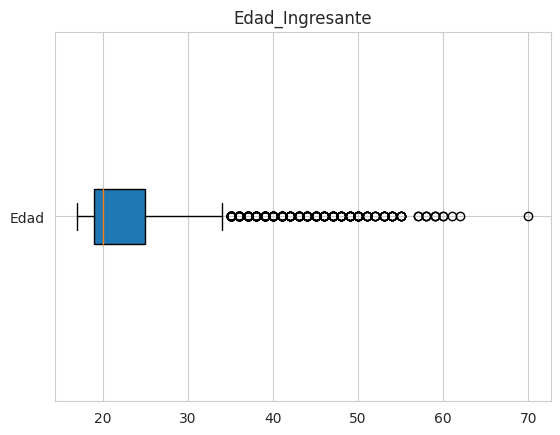

In [215]:
# Gráfica para la distribución de Edad de los Alumnos
plt.boxplot(df["Edad_Ingresante"], vert=False, patch_artist=True, labels=['Edad'])
plt.title("Edad_Ingresante")
plt.show()

In [216]:
df['Objetivo'].value_counts()

2    2209
1    1421
3     794
Name: Objetivo, dtype: int64

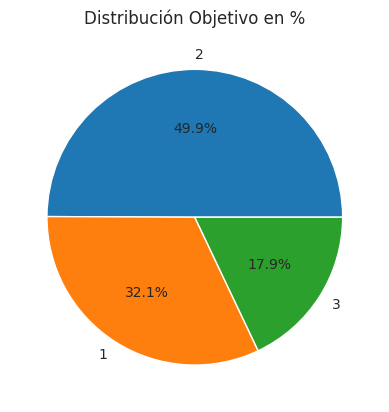

In [217]:
#Analizamos distribución en gráfico de torta
df_Objetivo = df['Objetivo'].value_counts()
efecto_explo = (0.1, 0, 0)

plt.pie(df_Objetivo, labels=df_Objetivo.index, autopct='%2.1f%%')
plt.title('Distribución Objetivo en %')
plt.show()

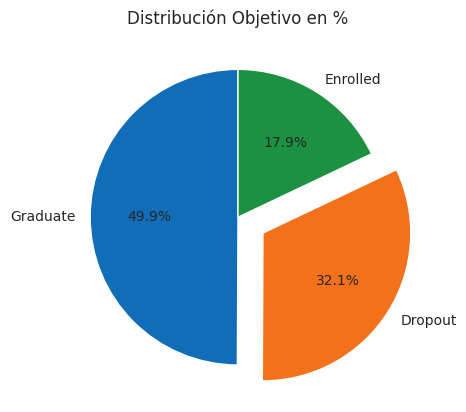

In [218]:
#Analizamos distribución en gráfico de torta
df_Objetivo = df['Objetivo'].value_counts()
Etiqueta = ['Graduate', 'Dropout', 'Enrolled']
colores = ['#126DB8', '#F3711A','#1C9141']
efecto_explo = (0, 0.2, 0)

fig, piechart = plt.subplots()
piechart.pie(df_Objetivo, labels= Etiqueta, explode =efecto_explo, autopct='%1.1f%%', colors= colores, startangle=90)
plt.title('Distribución Objetivo en %')
plt.show()

## Gráficos en Seaborn

In [219]:
import seaborn as sns


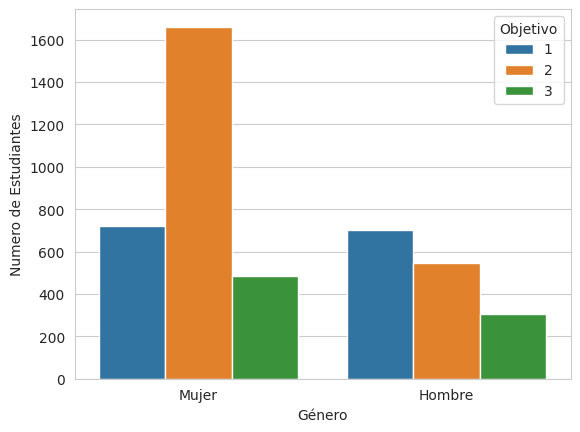

In [220]:
#Analizamos género desglosando el resultado académico
sns.countplot(data=df, x='Género', hue='Objetivo')

plt.xticks(ticks=[0,1], labels=['Mujer', 'Hombre'])
plt.ylabel('Numero de Estudiantes')
plt.show()

In [221]:
df['Objetivo'].value_counts()

2    2209
1    1421
3     794
Name: Objetivo, dtype: int64

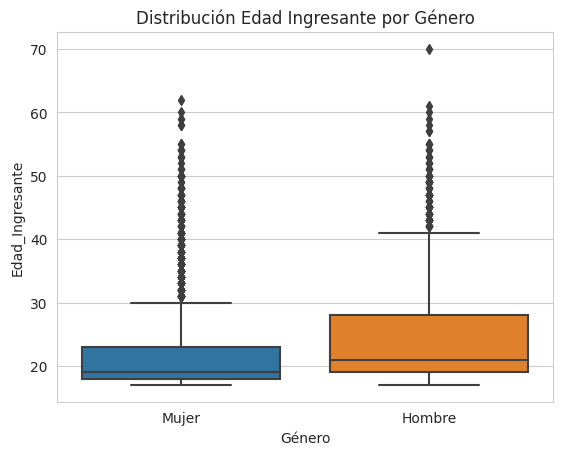

In [222]:
#Analizamos ditribución de Edad de Ingresantes segùn el Género
sns.boxplot(x='Género', y='Edad_Ingresante', data=df)
plt.xticks(ticks=[0,1], labels=['Mujer', 'Hombre'])
plt.title('Distribución Edad Ingresante por Género')
plt.show()

In [223]:
df['Género'].value_counts()

0    2868
1    1556
Name: Género, dtype: int64

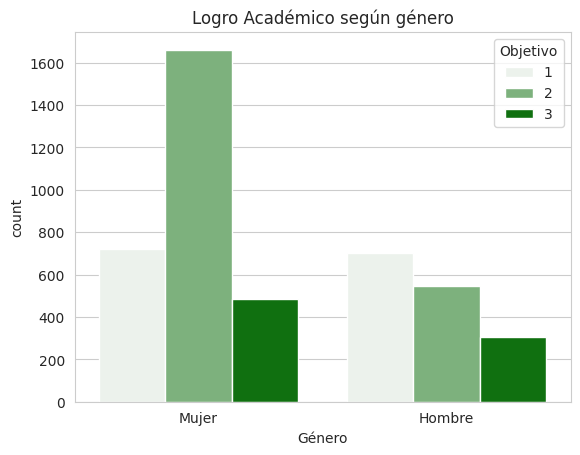

In [224]:
#Analizamos clasificación de Graduados, Inscriptos y Abandono
sns.countplot(data=df, x= df['Género'], hue = df['Objetivo'],  color ='green')
plt.xticks(ticks=[0,1], labels=['Mujer', 'Hombre'])
plt.title('Logro Académico según género')
plt.show()

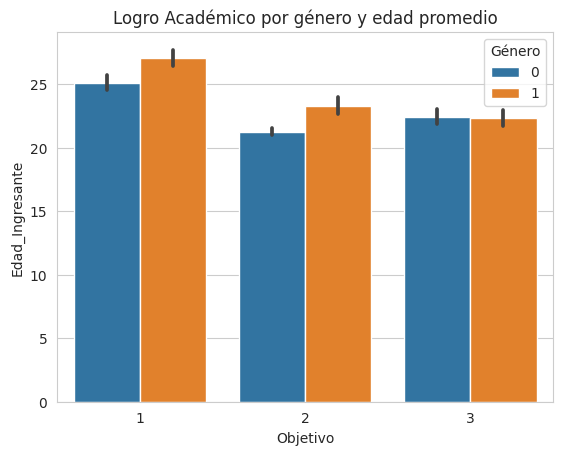

In [225]:
sns.barplot(x='Objetivo', y='Edad_Ingresante', hue='Género', data=df)
plt.title('Logro Académico por género y edad promedio')
plt.show()

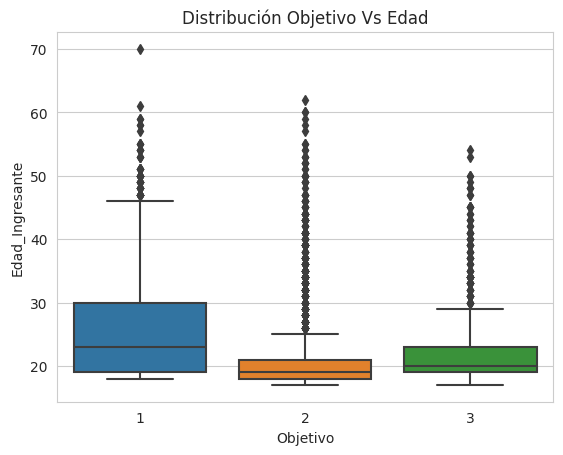

In [226]:
#Analizamos ditribución de Edad de Ingresantes segùn el Género
sns.boxplot(x='Objetivo', y='Edad_Ingresante', data=df)
plt.title('Distribución Objetivo Vs Edad')
plt.show()

#Variables Análisis

In [227]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Est_Civil                     4424 non-null   int64  
 1   Modo Aplicación               4424 non-null   int64  
 2   Orden Aplicación              4424 non-null   int64  
 3   Curso                         4424 non-null   int64  
 4   Turno                         4424 non-null   int64  
 5   Nivel_Educ_Previo             4424 non-null   int64  
 6   Nacionalidad                  4424 non-null   int64  
 7   Nivel_Educ_Madre              4424 non-null   int64  
 8   Nivel_Educ_Padre              4424 non-null   int64  
 9   Ocupación Madre               4424 non-null   int64  
 10  Ocupación Padre               4424 non-null   int64  
 11  Desplazados                   4424 non-null   int64  
 12  Necesidades_Especiales        4424 non-null   int64  
 13  Deu

In [228]:
print(df.columns)


Index(['Est_Civil', 'Modo Aplicación', 'Orden Aplicación', 'Curso', 'Turno',
       'Nivel_Educ_Previo', 'Nacionalidad', 'Nivel_Educ_Madre',
       'Nivel_Educ_Padre', 'Ocupación Madre', 'Ocupación Padre', 'Desplazados',
       'Necesidades_Especiales', 'Deudor', 'Pagado', 'Género', 'Becario',
       'Edad_Ingresante', 'Internacional', 'Asig 1º sem acreditadas',
       'Asig 1º sem matriculadas', 'Asig 1º sem evaluadas',
       'Asig 1º sem aprobadas', 'Asig 1º sem calificación',
       'Asig 1º sem sin evaluación', 'Asig 2º sem acreditadas',
       'Asig 2º sem matriculadas', 'Asig 2º sem evaluadas',
       'Asig 2º sem aprobadas', 'Asig 2º sem calificación',
       'Asig 2º sem sin evaluationes', 'Tasa_desempleo', 'Tasa_inflación',
       'PBI', 'Objetivo'],
      dtype='object')


In [229]:
df.head()


,Est_Civil,Modo Aplicación,Orden Aplicación,Curso,Turno,Nivel_Educ_Previo,Nacionalidad,Nivel_Educ_Madre,Nivel_Educ_Padre,Ocupación Madre,...,Asig 2º sem acreditadas,Asig 2º sem matriculadas,Asig 2º sem evaluadas,Asig 2º sem aprobadas,Asig 2º sem calificación,Asig 2º sem sin evaluationes,Tasa_desempleo,Tasa_inflación,PBI,Objetivo
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [230]:
#Se eliminan variables/columnas que no aportan datos al objetivo buscado
df.drop(['Modo Aplicación','Orden Aplicación','Nacionalidad','Tasa_desempleo','Tasa_inflación','PBI'],axis=1,inplace=True)

In [231]:
print(df.columns)

Index(['Est_Civil', 'Curso', 'Turno', 'Nivel_Educ_Previo', 'Nivel_Educ_Madre',
       'Nivel_Educ_Padre', 'Ocupación Madre', 'Ocupación Padre', 'Desplazados',
       'Necesidades_Especiales', 'Deudor', 'Pagado', 'Género', 'Becario',
       'Edad_Ingresante', 'Internacional', 'Asig 1º sem acreditadas',
       'Asig 1º sem matriculadas', 'Asig 1º sem evaluadas',
       'Asig 1º sem aprobadas', 'Asig 1º sem calificación',
       'Asig 1º sem sin evaluación', 'Asig 2º sem acreditadas',
       'Asig 2º sem matriculadas', 'Asig 2º sem evaluadas',
       'Asig 2º sem aprobadas', 'Asig 2º sem calificación',
       'Asig 2º sem sin evaluationes', 'Objetivo'],
      dtype='object')


# Selección de Feature

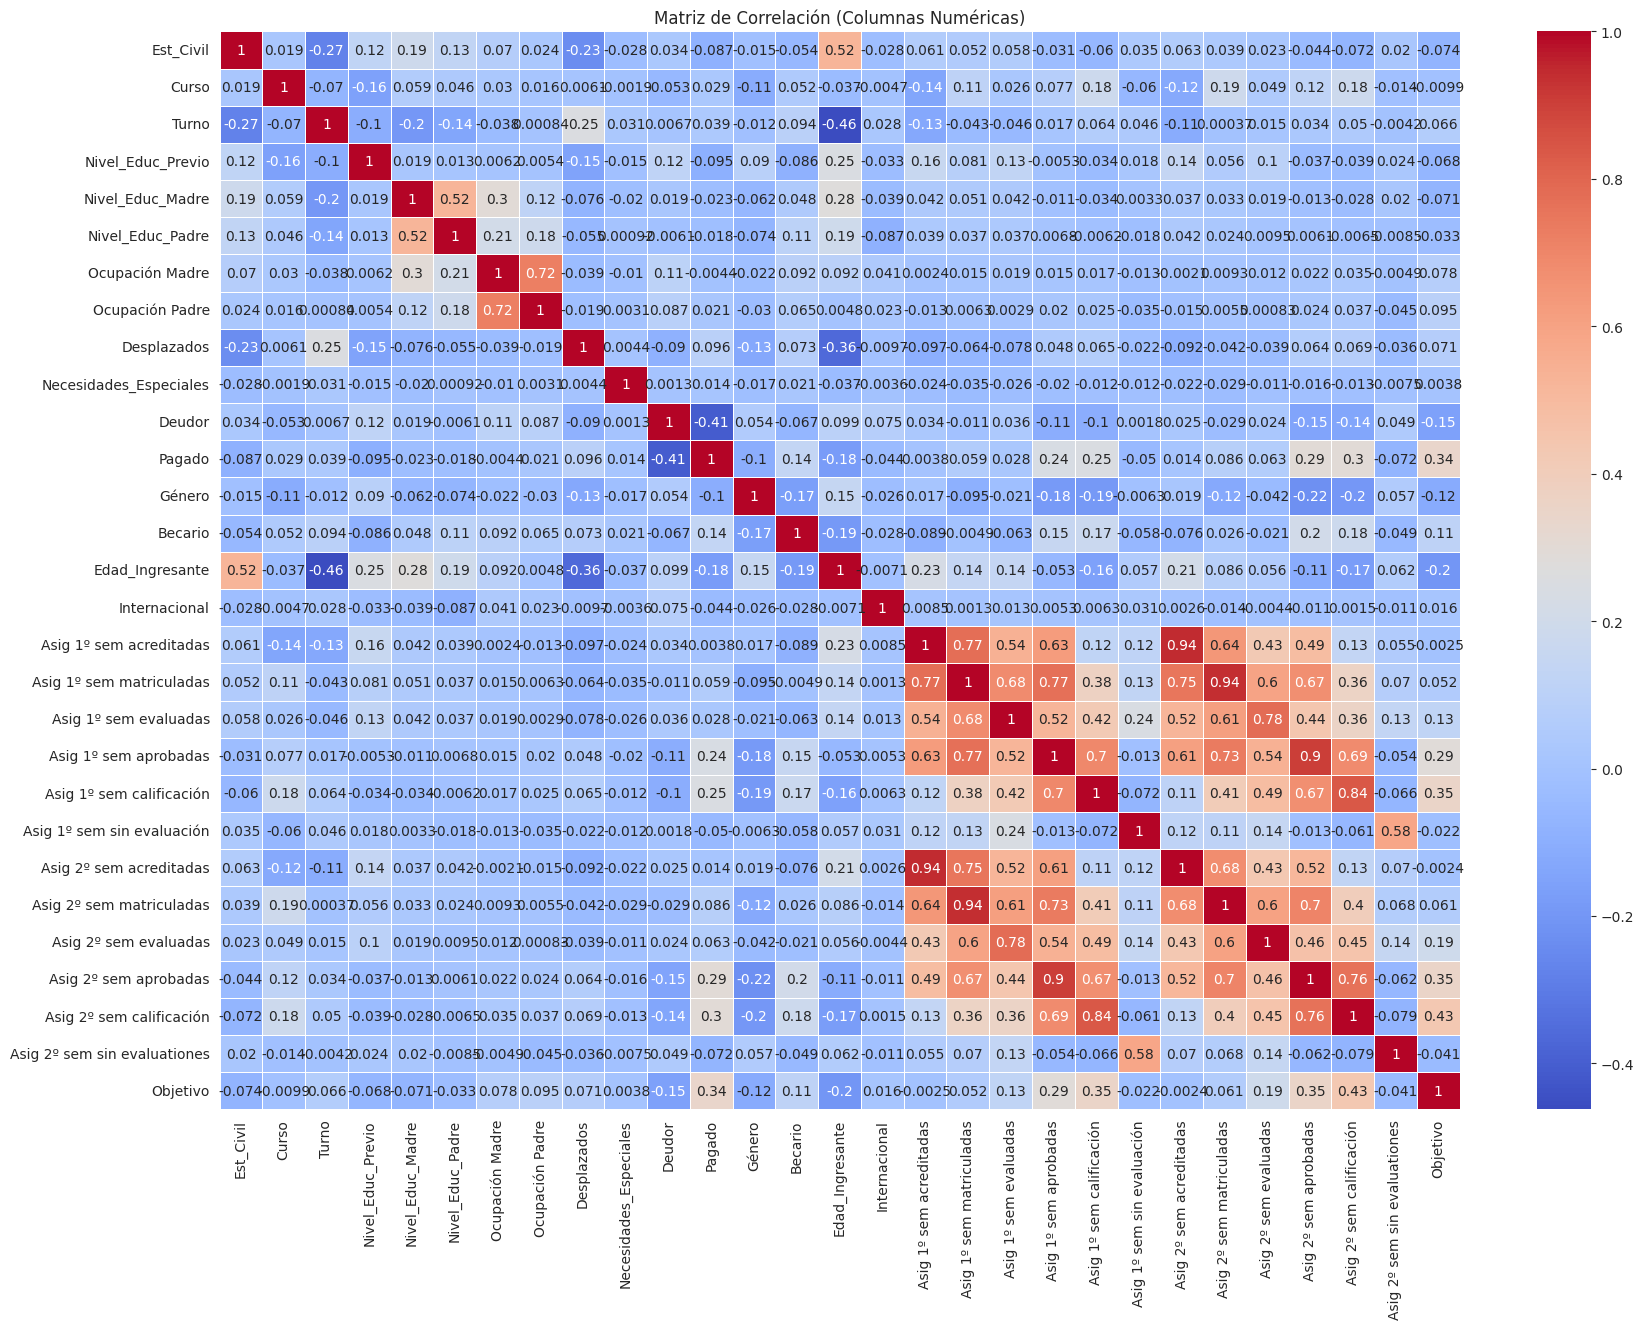

In [232]:
# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = numeric_columns.corr()

# Crear un heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (Columnas Numéricas)')
plt.show()

In [233]:
# Análisis Demográfico

demo_df = df[["Est_Civil", "Desplazados", "Género", "Edad_Ingresante", "Internacional"]]

# Análisis Socioeconómico
se_df = df[['Nivel_Educ_Madre','Nivel_Educ_Padre','Ocupación Madre', 'Ocupación Padre', 'Necesidades_Especiales', 'Deudor', 'Pagado', 'Becario']]

# Análisis académico
academico_df = df[['Asig 1º sem acreditadas',
       'Asig 1º sem matriculadas', 'Asig 1º sem evaluadas',
       'Asig 1º sem aprobadas', 'Asig 1º sem calificación',
       'Asig 1º sem sin evaluación', 'Asig 2º sem acreditadas',
       'Asig 2º sem matriculadas', 'Asig 2º sem evaluadas',
       'Asig 2º sem aprobadas', 'Asig 2º sem calificación',
       'Asig 2º sem sin evaluationes']]

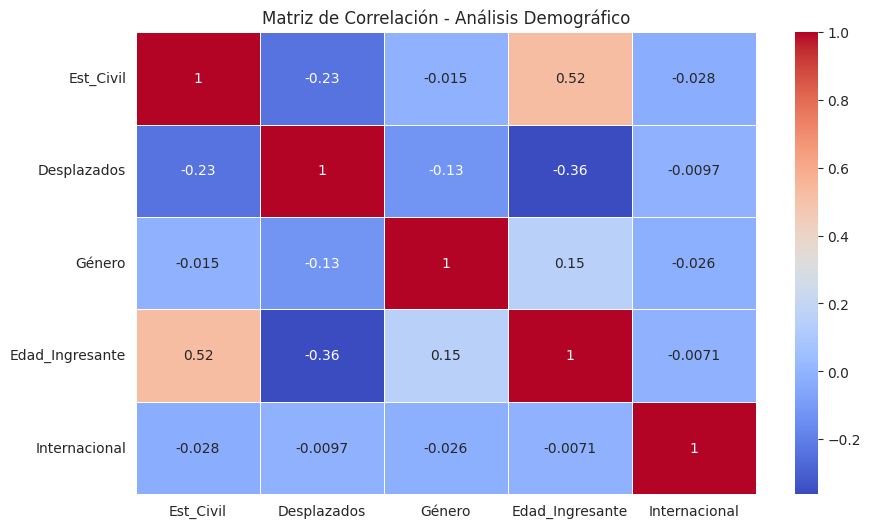

In [234]:
#Correlación Matriz Análisis Demográfico
correlation_demo = demo_df.corr()

# Crear un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_demo, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación - Análisis Demográfico')
plt.show()

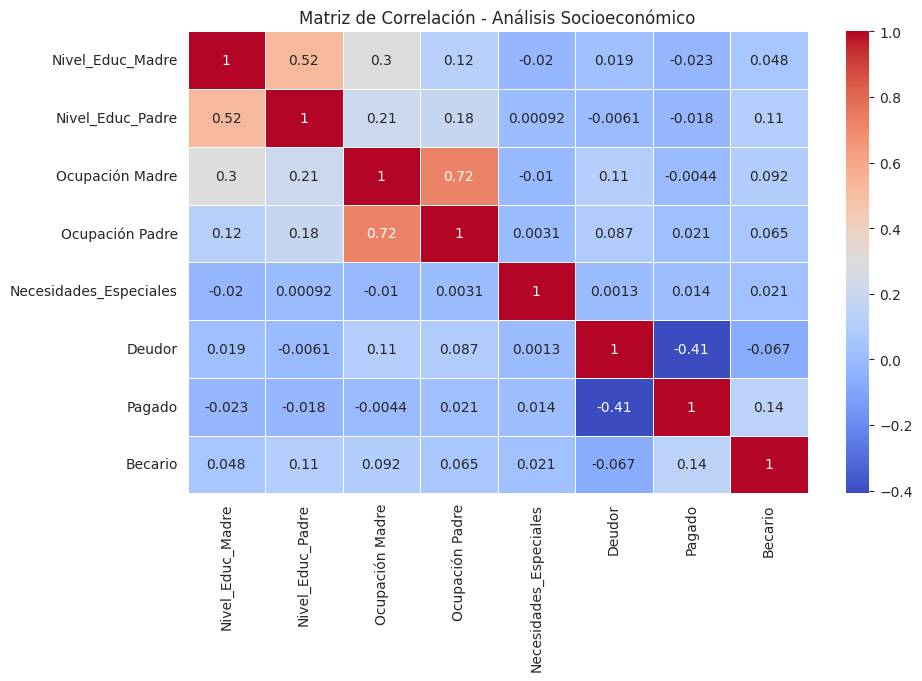

In [235]:
#Correlación Matriz Análisis Socioeconómico
correlation_se = se_df.corr()

# Crear un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_se, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación - Análisis Socioeconómico')
plt.show()

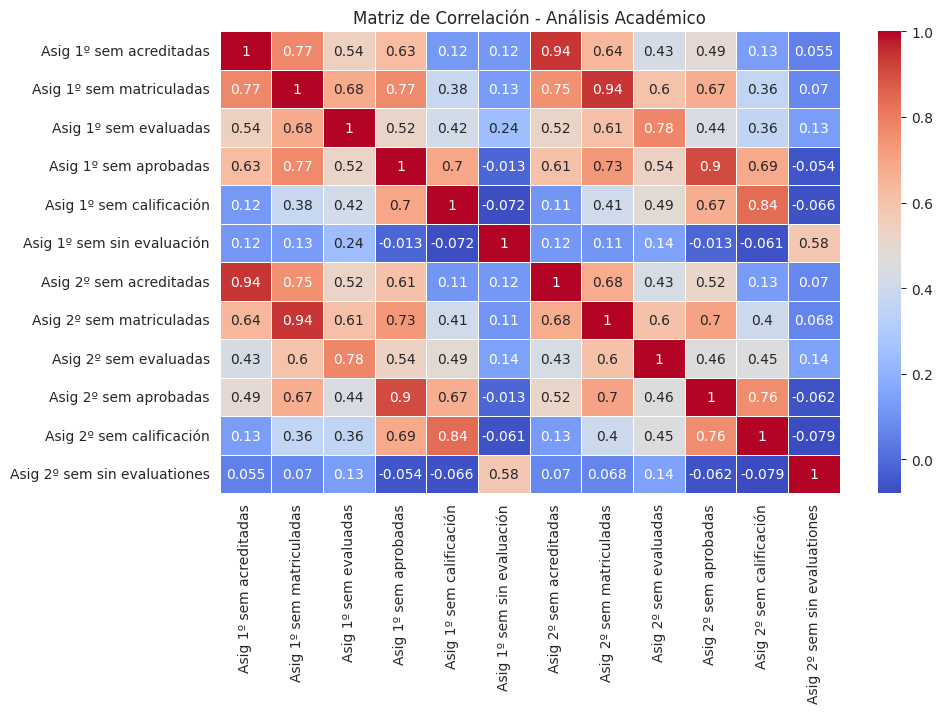

In [236]:
#Correlación Matriz Análisis Académico
correlation_academico = academico_df.corr()

# Crear un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_academico, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación - Análisis Académico')
plt.show()

# ALGORITMOS con Variable Objetivo completas:

1.  ABANDONO
2.  EXITO
3.  MATRICULADOS

##Algoritmo de Clasificación - Arbol de decisión
`Para nuestros datos categóricos `


In [237]:
#Variable objetivo Objetivo
df["Objetivo"]

0       1
1       2
2       1
3       2
4       2
       ..
4419    2
4420    1
4421    1
4422    2
4423    2
Name: Objetivo, Length: 4424, dtype: int64

In [238]:
#Variable objetivo Objetivo
df["Objetivo"].unique()

array([1, 2, 3])

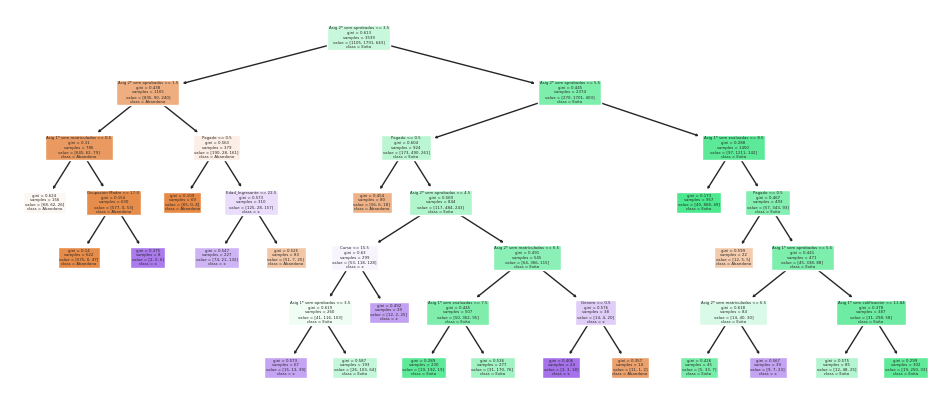

Rendimiento del árbol de decisión con 10 nodos: 0.75


In [239]:
# Paso 1: Importamos librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split #Dividr datos en enrtenamiento y prueba
from sklearn.tree import DecisionTreeClassifier, plot_tree #Arbol de decisión
from sklearn.metrics import accuracy_score # Accuracy = Exactitud
import matplotlib.pyplot as plt

# Paso 2: Seleccionar las variables
columnas_variables = ['Género', 'Pagado', 'Asig 2º sem calificación']
X= df.drop('Objetivo', axis=1)
#X = df[columnas_variables] #Variables independientes que me sirven para predecir
y = df['Objetivo'] #Variable objetivo

# Paso 3 : Divir el conjunto entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Definir el modelo árbol de decisión
model = DecisionTreeClassifier(max_leaf_nodes= 20)

# Paso 5: Hacemos el ajuste del modelo Entrenar el árbol de decisión
model.fit(X_train, y_train)

# Paso 6:  Visualizar el árbol de decisión con un máximo de 3 nodos
plt.figure(figsize=(12, 5))
plot_tree(model, feature_names=X.columns, class_names=['Abandono', 'Exito','x'], filled=True)
plt.show()

# Paso 7 : Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 8: Evaluar el rendimiento del árbol de decisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del árbol de decisión con 10 nodos: {accuracy:.2f}')

## Algoritmo: K-Nearest-Neighbor

In [240]:
#Paso 1: Importar las librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Paso 2: Cargar y preparar los datos: Divídelo en características (X) y variable objetivo (y).
X= df.drop('Objetivo', axis=1)
y = df['Objetivo'] #Variable objetivo

#Paso 3: Dividir conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 4: Escalar las características para asegurar que tengan la misma escala , es decir qu enormalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Paso 5= Crear y entrenar el modelo K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Paso 6:Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train)

#Paso 7: Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

#Paso 8 : Evaluar el accuracy del rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo K-Nearest Neighbors: {accuracy:.2f}')

Rendimiento del modelo K-Nearest Neighbors: 0.71


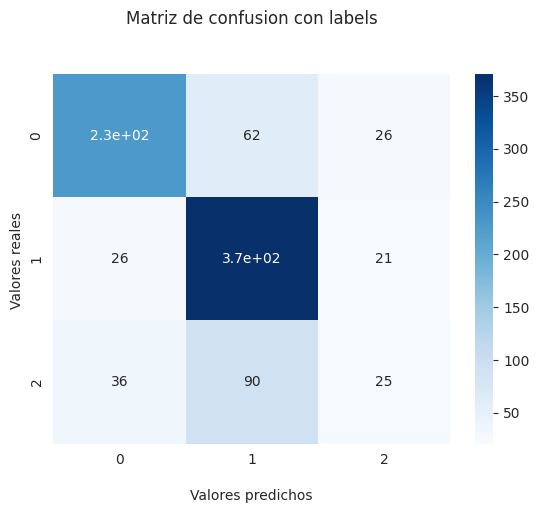

Matriz de Confusión:
[[228  62  26]
 [ 26 371  21]
 [ 36  90  25]]


In [241]:
#Importar librerías
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns

#Agregar heatmap de colores para cuadrantes
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');

#Contextuali<ar el gráfico
plt.show()
print('Matriz de Confusión:')
print(cm)

**Ninguno de lo algoritmos llega al 80% de rentimiento**

# ALGORITMOS filtrando sólo datos

1.   Abandono
2.   Exito

##Algoritmo: Arbol de Decisión

In [242]:
# Filtramos en nuestra columna "Objetivo" sólo los casos de abandono y éxito.
df_Succes = df.drop(df[df["Objetivo"] == 3].index)
print(df_Succes.shape)
df_Succes.info()


(3630, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Est_Civil                     3630 non-null   int64  
 1   Curso                         3630 non-null   int64  
 2   Turno                         3630 non-null   int64  
 3   Nivel_Educ_Previo             3630 non-null   int64  
 4   Nivel_Educ_Madre              3630 non-null   int64  
 5   Nivel_Educ_Padre              3630 non-null   int64  
 6   Ocupación Madre               3630 non-null   int64  
 7   Ocupación Padre               3630 non-null   int64  
 8   Desplazados                   3630 non-null   int64  
 9   Necesidades_Especiales        3630 non-null   int64  
 10  Deudor                        3630 non-null   int64  
 11  Pagado                        3630 non-null   int64  
 12  Género                        3630 non-null   int64

In [243]:
df_Succes['Objetivo'].unique()



array([1, 2])

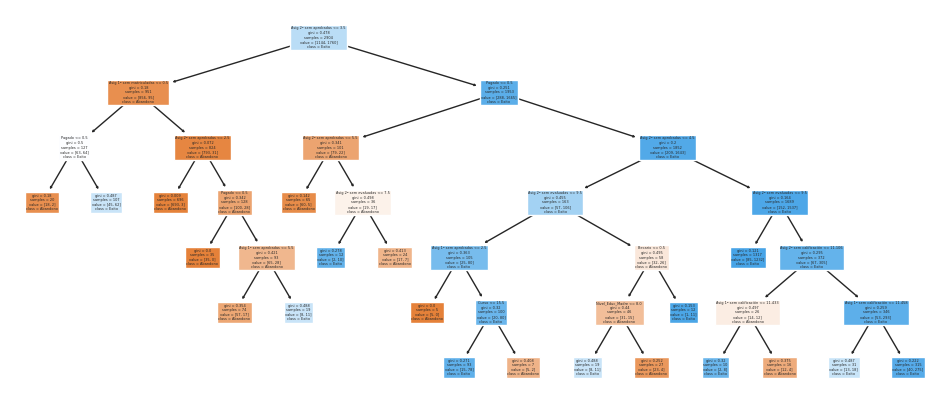

Rendimiento del árbol de decisión con 10 nodos: 0.89


In [244]:
# Paso 1: Importamos librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split #Dividr datos en enrtenamiento y prueba
from sklearn.tree import DecisionTreeClassifier, plot_tree #Arbol de decisión
from sklearn.metrics import accuracy_score # Accuracy = Exactitud
import matplotlib.pyplot as plt

# Paso 2: Seleccionar las variables
columnas_variables = ['Género', 'Pagado', 'Asig 2º sem calificación']
X= df_Succes.drop('Objetivo', axis=1)
#X = df[columnas_variables] #Variables independientes que me sirven para predecir
y = df_Succes['Objetivo'] #Variable objetivo

# Paso 3 : Divir el conjunto entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Definir el modelo árbol de decisión
model = DecisionTreeClassifier(max_leaf_nodes= 20)

# Paso 5: Hacemos el ajuste del modelo Entrenar el árbol de decisión
model.fit(X_train, y_train)

# Paso 6:  Visualizar el árbol de decisión con un máximo de 3 nodos
plt.figure(figsize=(12, 5))
plot_tree(model, feature_names=X.columns, class_names=['Abandono', 'Exito','x'], filled=True)
plt.show()

# Paso 7 : Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 8: Evaluar el rendimiento del árbol de decisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del árbol de decisión con 10 nodos: {accuracy:.2f}')

**FILTRANDO SOLO ABANDONO Y EXITO DE MI VARIABLE OBJETIVO AUMENTA EL RENDIMIENTO AL 89%**

#ML

Algoritmos y validación

In [245]:
!pip install mlxtend
!pip install scikit-learn

Utilizamos métricas de clasificación para analizar base de alumnos con abandono/exito

In [246]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

In [257]:
#Creación de nueva Base sólo con filas de alumnos con Objetivo = Abandono/Exito
df_base = df.drop(df[df["Objetivo"] == 3].index)
print(df_base.shape)
df_base.info()



(3630, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Est_Civil                     3630 non-null   int64  
 1   Curso                         3630 non-null   int64  
 2   Turno                         3630 non-null   int64  
 3   Nivel_Educ_Previo             3630 non-null   int64  
 4   Nivel_Educ_Madre              3630 non-null   int64  
 5   Nivel_Educ_Padre              3630 non-null   int64  
 6   Ocupación Madre               3630 non-null   int64  
 7   Ocupación Padre               3630 non-null   int64  
 8   Desplazados                   3630 non-null   int64  
 9   Necesidades_Especiales        3630 non-null   int64  
 10  Deudor                        3630 non-null   int64  
 11  Pagado                        3630 non-null   int64  
 12  Género                        3630 non-null   int64

In [258]:
df_base["Objetivo"].unique()

array([1, 2])

In [259]:
print(df_base.columns)

Index(['Est_Civil', 'Curso', 'Turno', 'Nivel_Educ_Previo', 'Nivel_Educ_Madre',
       'Nivel_Educ_Padre', 'Ocupación Madre', 'Ocupación Padre', 'Desplazados',
       'Necesidades_Especiales', 'Deudor', 'Pagado', 'Género', 'Becario',
       'Edad_Ingresante', 'Internacional', 'Asig 1º sem acreditadas',
       'Asig 1º sem matriculadas', 'Asig 1º sem evaluadas',
       'Asig 1º sem aprobadas', 'Asig 1º sem calificación',
       'Asig 1º sem sin evaluación', 'Asig 2º sem acreditadas',
       'Asig 2º sem matriculadas', 'Asig 2º sem evaluadas',
       'Asig 2º sem aprobadas', 'Asig 2º sem calificación',
       'Asig 2º sem sin evaluationes', 'Objetivo'],
      dtype='object')


In [261]:
print(df_base["Objetivo"])

0       1
1       2
2       1
3       2
4       2
       ..
4419    2
4420    1
4421    1
4422    2
4423    2
Name: Objetivo, Length: 3630, dtype: int64


In [262]:
# Definimos matriz de diseño X y vector respuesta y
X = df_base.drop('Objetivo', axis=1)
y = abs(df_base['Objetivo'] -1)



In [263]:
X


,Est_Civil,Curso,Turno,Nivel_Educ_Previo,Nivel_Educ_Madre,Nivel_Educ_Padre,Ocupación Madre,Ocupación Padre,Desplazados,Necesidades_Especiales,...,Asig 1º sem evaluadas,Asig 1º sem aprobadas,Asig 1º sem calificación,Asig 1º sem sin evaluación,Asig 2º sem acreditadas,Asig 2º sem matriculadas,Asig 2º sem evaluadas,Asig 2º sem aprobadas,Asig 2º sem calificación,Asig 2º sem sin evaluationes
0,1,2,1,1,13,10,6,10,1,0,...,0,0,0.000000,0,0,0,0,0,0.000000,0
1,1,11,1,1,1,3,4,4,1,0,...,6,6,14.000000,0,0,6,6,6,13.666667,0
2,1,5,1,1,22,27,10,10,1,0,...,0,0,0.000000,0,0,6,0,0,0.000000,0
3,1,15,1,1,23,27,6,4,1,0,...,8,6,13.428571,0,0,6,10,5,12.400000,0
4,2,3,0,1,22,28,10,10,0,0,...,9,5,12.333333,0,0,6,6,6,13.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,15,1,1,1,1,6,5,0,0,...,7,5,13.600000,0,0,6,8,5,12.666667,0
4420,1,15,1,1,1,1,10,10,1,0,...,6,6,12.000000,0,0,6,6,2,11.000000,0
4421,1,12,1,1,22,27,10,10,1,0,...,8,7,14.912500,0,0,8,9,1,13.500000,0
4422,1,9,1,1,22,27,8,5,1,0,...,5,5,13.800000,0,0,5,6,5,12.000000,0


In [264]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Objetivo, Length: 3630, dtype: int64

In [265]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Definimos el modelo con algoritmo de clasificación. Seleccionamos modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=42)
#Hacmeos el fit de los datos de entrenamiento
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

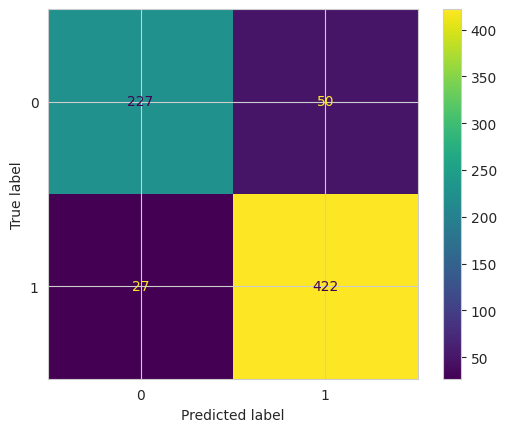

In [266]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcula la matriz de confusión a partir de las predicciones y los verdaderos valores
cm = confusion_matrix(y_test, preds)

# Crea una instancia de ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Muestra la matriz de confusión
disp.plot()
plt.show()

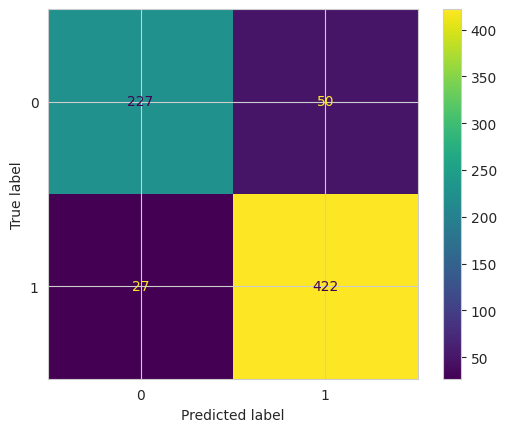

In [267]:
from sklearn.metrics import ConfusionMatrixDisplay

# Crea una instancia de ConfusionMatrixDisplay desde las predicciones y los verdaderos valores
disp = ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [268]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([227,  50,  27, 422])

La matriz de confusión resultante, [227, 50, 27, 422], es una representación unidimensional que contiene cuatro valores. Estos valores representan:

* 227: **Verdaderos positivos** (True Positives, TP): El número de muestras que fueron clasificadas correctamente como positivas (clase 1 malignos) por el modelo.
* 50: **Falsos negativos** (False Negatives, FN): El número de muestras que fueron clasificadas incorrectamente como negativas (clase 0 benigno) por el modelo cuando en realidad eran positivas.
* 27: **Falsos positivos** (False Positives, FP): El número de muestras que fueron clasificadas incorrectamente como positivas por el modelo cuando en realidad eran negativas.
* 422: **Verdaderos negativos** (True Negatives, TN): El número de muestras que fueron clasificadas correctamente como negativas por el modelo.

In [269]:
#Calcular las métricas de validación de algoritmos de clasificación

In [270]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.8939393939393939

In [272]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.8939393939393939

In [271]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.8940677966101694, 0.8937007874015748)

In [273]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.9398663697104677, 0.8194945848375451)

In [274]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

(0.9163952225841477, 0.8549905838041432)

In [275]:
# Ejectura todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       277
           1       0.89      0.94      0.92       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.89       726
weighted avg       0.89      0.89      0.89       726

